# SVD y PCA: Ejercicio 1

### En esta página https://www.kite.com/python/examples/250/numpy-compute-the-singular-value-decomposition-of-a-matrix se encuentran las instrucciones para calcular la descomposición en valores singulares de una matriz en python.

## 1 En una libreta de Jupyter, calcula la SVD de la matriz A = [[1, 2], [2, 3]]. Grafica el efecto sobre el conjunto de los vectores en R2 de longitud 1 (el círculo de centro [0, 0] y radio 1) al aplicarle V T luego Σ y luego U. Compara el efecto de aplicarle al círculo directamente A.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Matriz A

In [2]:
A = np.matrix([[1, 2], 
               [2, 3]])
A

matrix([[1, 2],
        [2, 3]])

### Descomponemos la Matriz A en valores singulares

In [3]:
u, s, v = np.linalg.svd(A)

In [4]:
print (u)
print(s)
print(v)

[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
[4.23606798 0.23606798]
[[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]


In [5]:
np.dot(u, np.dot(np.diag(s), v))

matrix([[1., 2.],
        [2., 3.]])

### Conjunto de los vectores en R2 de longitud 1

In [6]:
R = np.array([[1,0],[-1,0],[0,-1], [0,1],[0.7,0.714],[0.7,-0.714],[-0.7,-0.714],[-0.7,0.714]])
origen = np.array([[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]])

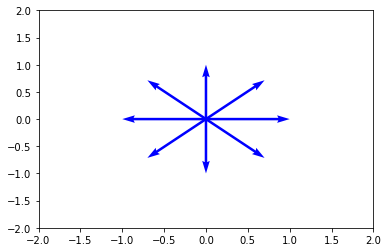

In [7]:
ax = plt.axes()
plt.quiver(*origen, R[:,0], R[:,1], color=['b'], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.draw()
plt.show()

### Calculamos el efecto de u, s, v en R

In [8]:
Rsvd = np.transpose(v)@np.diag(s)@u@np.transpose(R)
print(Rsvd)

[[ 1.    -1.    -2.     2.     2.128 -0.728 -2.128  0.728]
 [ 2.    -2.    -3.     3.     3.542 -0.742 -3.542  0.742]]


In [9]:
RsvdT= np.transpose(Rsvd)
R2= np.array(RsvdT)
print(R2)

[[ 1.     2.   ]
 [-1.    -2.   ]
 [-2.    -3.   ]
 [ 2.     3.   ]
 [ 2.128  3.542]
 [-0.728 -0.742]
 [-2.128 -3.542]
 [ 0.728  0.742]]


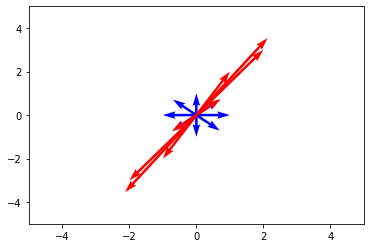

In [10]:
ax = plt.axes()
plt.quiver(*origen, R[:,0], R[:,1], color=['b'], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origen, R2[:,0], R2[:,1], color=['r'], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.show()

### Calculamos el efecto de A en R

In [11]:
AR= A@np.transpose(R)
ARt= np.transpose(AR)
ARv= np.array(ARt)
print(ARv)

[[ 1.     2.   ]
 [-1.    -2.   ]
 [-2.    -3.   ]
 [ 2.     3.   ]
 [ 2.128  3.542]
 [-0.728 -0.742]
 [-2.128 -3.542]
 [ 0.728  0.742]]


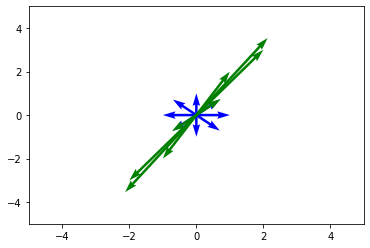

In [12]:
ax = plt.axes()
plt.quiver(*origen, R[:,0], R[:,1], color=['b'], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origen, ARv[:,0], ARv[:,1], color=['g'], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.show()

### Obtenemos el mismo efecto

## 2 Calcula la matriz de rank 1 que mejor aproxime a A

In [13]:
u1= u[:, :1]
s1= np.diag(s)[:, :1]
v1= v[:1, :]
np.dot(u,(np.dot(s1,v1)))

matrix([[1.17082039, 1.89442719],
        [1.89442719, 3.06524758]])